Data Processing



In [1]:
import pandas as pd 

df=pd.read_csv('MSFT.csv')

df

C:\Users\user\AppData\Local\Temp\ipykernel_13048\473827171.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9535,2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700
9536,2024-01-16,393.660004,394.029999,387.619995,390.269989,390.269989,27202300
9537,2024-01-17,387.980011,390.109985,384.809998,389.470001,389.470001,22234100
9538,2024-01-18,391.720001,393.989990,390.119995,393.869995,393.869995,23392100


In [2]:
df=df[['Date','Close']]

In [4]:
import datetime

def str_to_datetime(s):
    split=s.split('-')
    year, month, day= int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object


datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df['Date']=df['Date'].apply(str_to_datetime)

C:\Users\user\AppData\Local\Temp\ipykernel_13048\1499576352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


In [6]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9535,2024-01-12,388.470001
9536,2024-01-16,390.269989
9537,2024-01-17,389.470001
9538,2024-01-18,393.869995


In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-12,388.470001
2024-01-16,390.269989
2024-01-17,389.470001


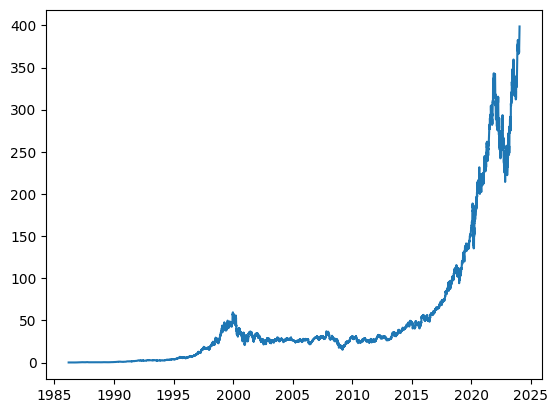

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [36]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-01-20', 
                                '2023-01-20', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-01-20,310.200012,302.649994,303.329987,301.600006
1,2022-01-21,302.649994,303.329987,301.600006,296.029999
2,2022-01-24,303.329987,301.600006,296.029999,296.369995
3,2022-01-25,301.600006,296.029999,296.369995,288.489990
4,2022-01-26,296.029999,296.369995,288.489990,296.709991
...,...,...,...,...,...
247,2023-01-13,228.850006,235.770004,238.509995,239.229996
248,2023-01-17,235.770004,238.509995,239.229996,240.350006
249,2023-01-18,238.509995,239.229996,240.350006,235.809998
250,2023-01-19,239.229996,240.350006,235.809998,231.929993


In [37]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

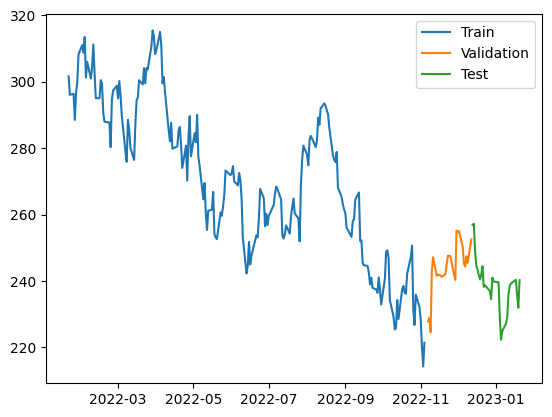

In [38]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Model Training

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
7/7 [==============================] - 2s 76ms/step - loss: 73798.1016 - mean_absolute_error: 270.6270 - val_loss: 59165.9844 - val_mean_absolute_error: 243.1222
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 73559.6719 - mean_absolute_error: 270.1851 - val_loss: 58961.1562 - val_mean_absolute_error: 242.7005
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 73321.5859 - mean_absolute_error: 269.7442 - val_loss: 58723.1602 - val_mean_absolute_error: 242.2097
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 73026.1406 - mean_absolute_error: 269.1936 - val_loss: 58398.6445 - val_mean_absolute_error: 241.5388
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 72646.9062 - mean_absolute_error: 268.4876 - val_loss: 57996.1250 - val_mean_absolute_error: 240.7040
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 72108.3828 - mean_absolute_error: 267.4870 - val_loss: 57376.09

Plotting Results

7/7 [==============================] - 0s 1ms/step


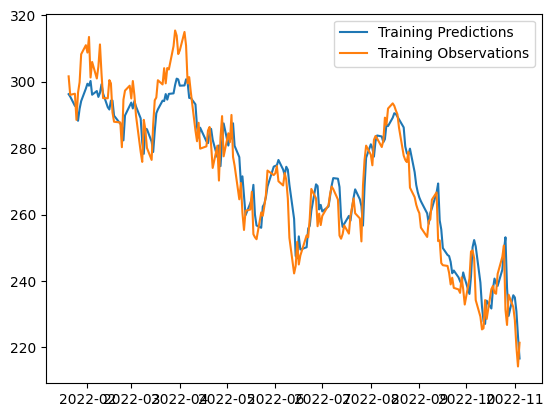

In [40]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


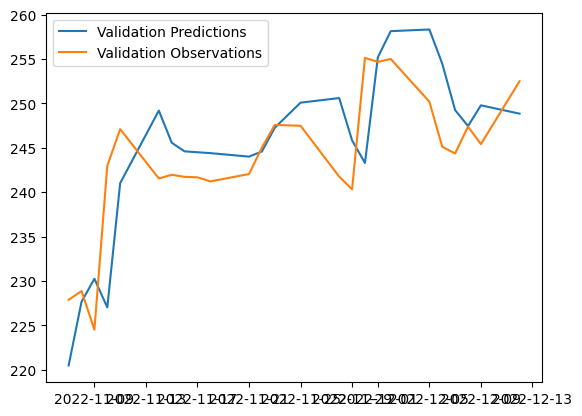

In [41]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 20ms/step


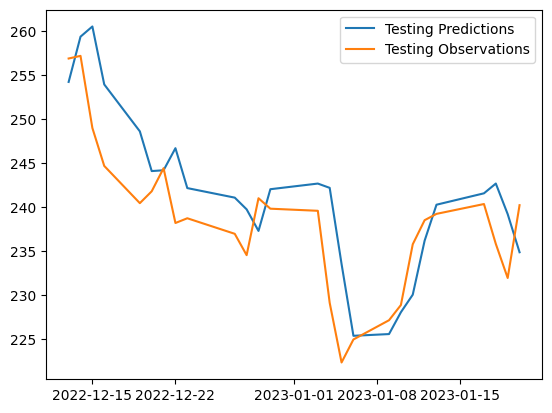

In [42]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

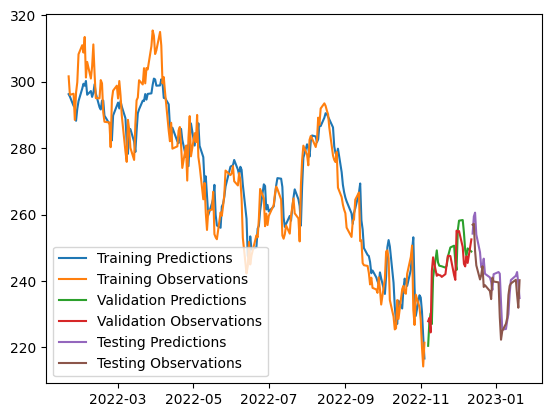

In [43]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

Recursive Predictions

In [44]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction


1/1 [==============================] - 0s 23ms/step


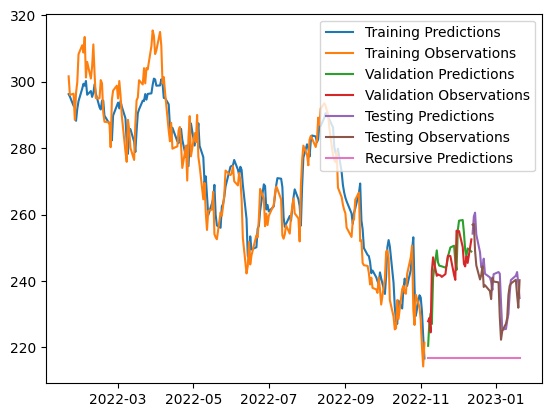

In [45]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])